In [53]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [54]:
datasets = ["tumblr_ct1", "PROTEINS", "MUTAG", "IMDB-BINARY", "ENZYMES", "PTC_MR", "MSRC_9"]
methods = ["Jin_Multi", "Jin_Spectral", "Chen_GW", "Our_Spectral", "Our_Iter"]
# dist_data = [np.load(f'./dists_{name}.npy') for name in datasets]
dist_data = np.load("/home/carlos/Desktop/CoarseningProject/dists_MSRC_9_exp1.npy") 

In [55]:
dist_data.shape

(5, 221, 19)

In [56]:
x = np.linspace(0, 1, 21)[1:-1]
x

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [57]:
x = np.linspace(0, 1, 21)[1:-1] * 100 
Y = np.mean(dist_data, axis=1).T

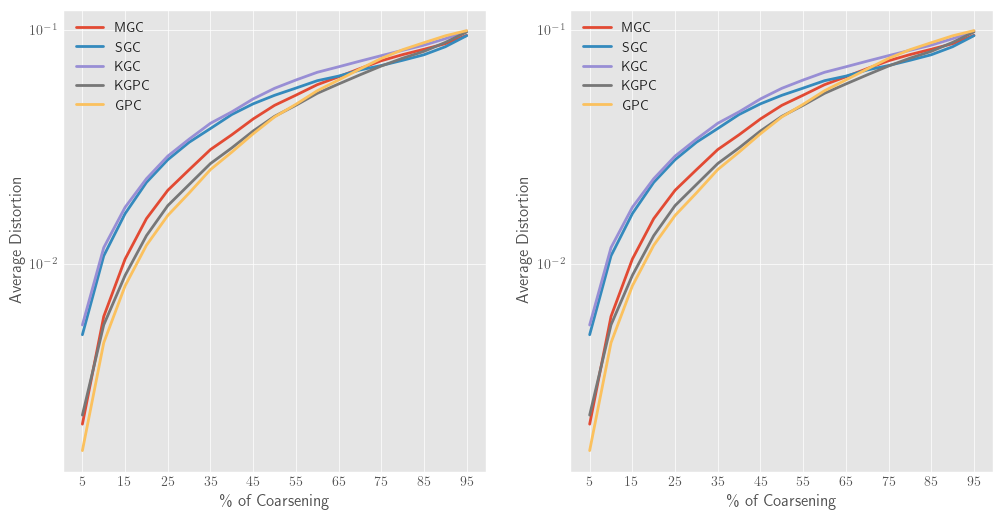

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plt.rcParams['text.usetex'] = True
plt.style.use('bmh')

axs[0].semilogy(x, Y)
axs[0].set_xlabel('\% of Coarsening')
axs[0].set_ylabel('Average Distortion')
axs[0].legend(["MGC", "SGC", "KGC", "KGPC", "GPC"])
axs[0].set_xticks(x[::2])

axs[1].semilogy(x, Y)
axs[1].set_xlabel('\% of Coarsening')
axs[1].set_ylabel('Average Distortion')
axs[1].legend(["MGC", "SGC", "KGC", "KGPC", "GPC"])
axs[1].set_xticks(x[::2])
plt.show()

In [70]:
from collections import OrderedDict

linestyles = OrderedDict(
    [('loosely dotted',      (0, (1, 10))),
     ('dotted',              (0, (1, 5))),
     ('loosely dashed',      (0, (5, 10))),
     ('solid',               (0, ())),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1))),

     ('loosely dashed',      (0, (5, 10))),
     ('dashed',              (0, (5, 5))),
     ('densely dashed',      (0, (5, 1))),

     ('loosely dashdotted',  (0, (3, 10, 1, 10))),
     ('dashdotted',          (0, (3, 5, 1, 5))),
     ('densely dashdotted',  (0, (3, 1, 1, 1))),

     ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))])

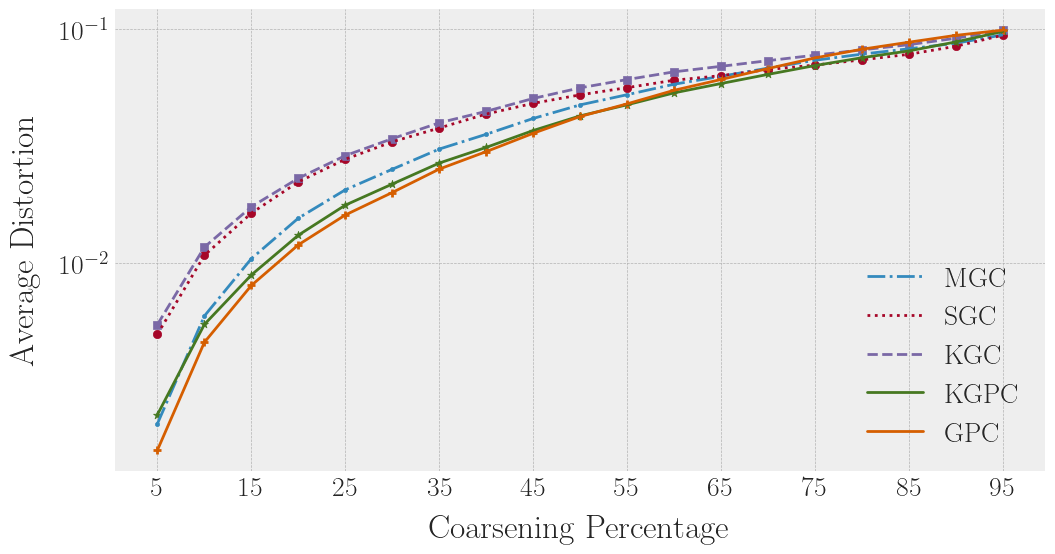

In [93]:
fig, axs = plt.subplots(1, 1, figsize=(12, 6))

plt.rcParams['text.usetex'] = True
# plt.style.use('ggplot')
plt.style.use('bmh')
# plt.style.use('seaborn-v0_8-darkgrid')

styles = ['dashdot', 'dotted', 'dashed', 'solid', 'solid']
markers = [".", "o", "s", "*", "+"]

for style, y, m in zip(styles, Y.T, markers):
    axs.semilogy(x, y, linestyle=style, linewidth=2)
axs.legend(["MGC", "SGC", "KGC", "KGPC", "GPC"])

for style, y, m in zip(styles, Y.T, markers):
    axs.scatter(x, y, marker=m)


# axs.semilogy(x, y)
axs.set_xlabel('Coarsening Percentage', labelpad=10)
axs.set_ylabel('Average Distortion', labelpad=15)
axs.set_xticks(x[::2])
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 20})
# plt.show()